# Keras Basics

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from sklearn import metrics as sk_metrics
from sklearn import linear_model as sk_lm
from sklearn import model_selection as sk_msel
from sklearn import discriminant_analysis as sk_lda

### Regression with Keras Neural Network

In [9]:
%%bash
curl -O 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 58988  100 58988    0     0  41984      0  0:00:01  0:00:01 --:--:-- 41954


In [86]:
# Test Data
concrete_data = pd.read_csv('concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [87]:
concrete_data.shape

(1030, 9)

In [88]:
# Check for null values
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [89]:
# Split in predictors and target dataframes
predictors=concrete_data.drop(columns=['Strength'])
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [90]:
target=concrete_data['Strength']
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [91]:
# Number of predictors
n_predictors=len(predictors.columns)
n_predictors

8

In [92]:
# normalize predictors
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [93]:
# Build the neural network
model=keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='relu', input_shape=(n_predictors,)))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [94]:
# Fit the model
model.fit(x=predictors_norm, y=target, validation_split=0.3, epochs=100, verbose=2)

Train on 721 samples, validate on 309 samples
Epoch 1/100
 - 0s - loss: 1655.0032 - val_loss: 1156.2747
Epoch 2/100
 - 0s - loss: 1595.6777 - val_loss: 1092.8382
Epoch 3/100
 - 0s - loss: 1515.8289 - val_loss: 1011.2338
Epoch 4/100
 - 0s - loss: 1407.8161 - val_loss: 905.3936
Epoch 5/100
 - 0s - loss: 1261.6263 - val_loss: 772.3304
Epoch 6/100
 - 0s - loss: 1075.5576 - val_loss: 623.9816
Epoch 7/100
 - 0s - loss: 865.8644 - val_loss: 475.6044
Epoch 8/100
 - 0s - loss: 658.2514 - val_loss: 351.5620
Epoch 9/100
 - 0s - loss: 479.9514 - val_loss: 265.5301
Epoch 10/100
 - 0s - loss: 351.9400 - val_loss: 218.6374
Epoch 11/100
 - 0s - loss: 276.7954 - val_loss: 199.6293
Epoch 12/100
 - 0s - loss: 240.8109 - val_loss: 193.8043
Epoch 13/100
 - 0s - loss: 226.1077 - val_loss: 189.9992
Epoch 14/100
 - 0s - loss: 218.4278 - val_loss: 187.7835
Epoch 15/100
 - 0s - loss: 213.1976 - val_loss: 183.0700
Epoch 16/100
 - 0s - loss: 208.2683 - val_loss: 180.2220
Epoch 17/100
 - 0s - loss: 204.0032 - val_

**-> training MSE: 86, cross-val MSE: 120**

In [57]:
# Compare to standard linear regression with scikit-learn
lm=sk_lm.LinearRegression()
np.mean(-sk_msel.cross_val_score(lm, X=predictors_norm, y=target, cv=5, scoring='neg_mean_squared_error'))

128.13775612964702

### Classification with Keras

In [32]:
# Load Keras test data: Images of handwritten numbers

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [33]:
X_train.shape

(60000, 28, 28)

-> Training dataset contains data for 60.000 images with 28x28 pixels

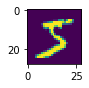

In [34]:
# Visualize first image
fig, ax = plt.subplots(figsize=(1, 1))
ax.imshow(X_train[0], interpolation='nearest')

In [35]:
# Flatten array of pixels, so that X becomes 2 dimensional
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float')

In [36]:
X_train.dtype

dtype('float64')

In [37]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
X_train.shape

(60000, 784)

In [39]:
# Explore target 
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [40]:
# One hot encode target
y_train_enc = keras.utils.to_categorical(y_train)
y_test_enc = keras.utils.to_categorical(y_test)
y_train_enc

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [41]:
y_train_enc.shape

(60000, 10)

In [43]:
# create model
model = keras.models.Sequential()
model.add(keras.layers.Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(y_train_enc.shape[1], activation='softmax'))

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
X_test.shape

(10000, 784)

In [29]:
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 26s - loss: 1.0730 - accuracy: 0.8064 - val_loss: 0.3632 - val_accuracy: 0.9036
Epoch 2/10
 - 29s - loss: 0.2902 - accuracy: 0.9261 - val_loss: 0.2283 - val_accuracy: 0.9482
Epoch 3/10
 - 24s - loss: 0.1709 - accuracy: 0.9554 - val_loss: 0.1669 - val_accuracy: 0.9582
Epoch 4/10
 - 23s - loss: 0.1482 - accuracy: 0.9605 - val_loss: 0.2101 - val_accuracy: 0.9481
Epoch 5/10
 - 26s - loss: 0.1216 - accuracy: 0.9674 - val_loss: 0.2122 - val_accuracy: 0.9595
Epoch 6/10
 - 25s - loss: 0.1152 - accuracy: 0.9707 - val_loss: 0.1589 - val_accuracy: 0.9618
Epoch 7/10
 - 25s - loss: 0.0984 - accuracy: 0.9745 - val_loss: 0.1492 - val_accuracy: 0.9612
Epoch 8/10
 - 26s - loss: 0.0973 - accuracy: 0.9754 - val_loss: 0.1656 - val_accuracy: 0.9635
Epoch 9/10
 - 23s - loss: 0.0846 - accuracy: 0.9791 - val_loss: 0.1510 - val_accuracy: 0.9703
Epoch 10/10
 - 23s - loss: 0.0830 - accuracy: 0.9800 - val_loss: 0.2009 - val_accuracy: 0.9596


In [45]:
# Compare with Linear Discriminant Analysis (sklearn)
lda=sk_lda.LinearDiscriminantAnalysis().fit(X_train, y_train)

In [49]:
# LDA Accuracy
y_pre=lda.predict(X_test)
sk_metrics.accuracy_score(y_test, y_pre)

0.873

### Image Classification revisted - with convolutional neural network

In [52]:
# load data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [53]:
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data

In [54]:
X_train.shape

(60000, 28, 28, 1)

In [55]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

num_classes = y_test.shape[1] # number of categories
num_classes

10

In [56]:
# Use same data as above

# create convolutional model
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(keras.layers.Conv2D(8, (2, 2), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [57]:
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 25s - loss: 0.4764 - accuracy: 0.8659 - val_loss: 0.1318 - val_accuracy: 0.9609
Epoch 2/10
 - 23s - loss: 0.1108 - accuracy: 0.9673 - val_loss: 0.0891 - val_accuracy: 0.9736
Epoch 3/10
 - 23s - loss: 0.0834 - accuracy: 0.9753 - val_loss: 0.0721 - val_accuracy: 0.9763
Epoch 4/10
 - 23s - loss: 0.0690 - accuracy: 0.9795 - val_loss: 0.0572 - val_accuracy: 0.9811
Epoch 5/10
 - 22s - loss: 0.0592 - accuracy: 0.9822 - val_loss: 0.0568 - val_accuracy: 0.9808
Epoch 6/10
 - 23s - loss: 0.0522 - accuracy: 0.9847 - val_loss: 0.0477 - val_accuracy: 0.9844
Epoch 7/10
 - 22s - loss: 0.0468 - accuracy: 0.9859 - val_loss: 0.0394 - val_accuracy: 0.9877
Epoch 8/10
 - 21s - loss: 0.0423 - accuracy: 0.9872 - val_loss: 0.0398 - val_accuracy: 0.9868
Epoch 9/10
 - 19s - loss: 0.0390 - accuracy: 0.9884 - val_loss: 0.0389 - val_accuracy: 0.9869
Epoch 10/10
 - 23s - loss: 0.0369 - accuracy: 0.9888 - val_loss: 0.0372 - val_accuracy: 0.9876
